# **Capitulo 5 – Decision Trees. Regresión**

### Librerias

In [305]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

Los tamaños de fuente por defecto para que las figuras queden más bonitas:

In [306]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Y creemos la carpeta `images/decision_trees` (si no existe ya), y definamos la función `save_fig()` que se utiliza a través de este Notebook para guardar las figuras:

In [307]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Cargamos datos

In [308]:
import pandas as pd
penguins = pd.read_csv("data/penguins_pre.csv")

In [309]:
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,target,FEMALE,MALE,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,1.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0.0,1.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,0.0,0.0,1.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,0.0,1.0,0.0,0.0,0.0,1.0


# Creamos train/test

In [310]:
X = penguins.drop(["body_mass_g"], axis=1)
y = penguins["body_mass_g"]


In [311]:
X.rename(columns={"target": "species"}, inplace=True)

In [312]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X["species"]):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

# Arbol de regresión

In [330]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(train_set, train_y_set)

DecisionTreeRegressor(max_depth=2, random_state=42)

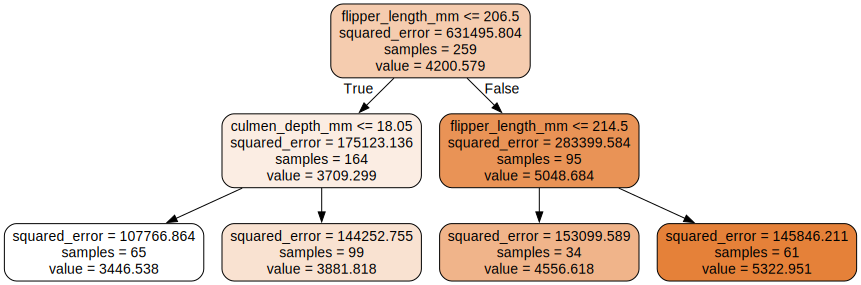

In [314]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [315]:
# COmprobar que se cumplen las samples para cada nodo y hoja


In [316]:
# value es la media. Comprobar
train = penguins.iloc[train_index]

train[train['flipper_length_mm'] <= 206.5]['body_mass_g'].mean()
train[train['flipper_length_mm'] > 206.5]['body_mass_g'].mean()
train[(train['flipper_length_mm'] <= 206.5)&(train['culmen_depth_mm'] <= 18.05)]['body_mass_g'].mean()
train[(train['flipper_length_mm'] <= 206.5)&(train['culmen_depth_mm'] > 18.05)]['body_mass_g'].mean()
train[(train['flipper_length_mm'] > 206.5)&(train['flipper_length_mm'] <= 214.5)]['body_mass_g'].mean()
train[(train['flipper_length_mm'] > 206.5)&(train['flipper_length_mm'] > 214.5)]['body_mass_g'].mean()

5322.950819672131

In [317]:
# squared_error: es el MSE (mean squared error) en esa casilla usando como predicción la media de la sample de ese nodo/hoj
((train_y_set - train['body_mass_g'].mean())**2).mean()
nodo1 = ((train[train["flipper_length_mm"]<=206.5]["body_mass_g"] - train[train["flipper_length_mm"]<=206.5]["body_mass_g"].mean())**2).mean()
nodo2 = ((train[train["flipper_length_mm"]>206.5]["body_mass_g"] - train[train["flipper_length_mm"]>206.5]["body_mass_g"].mean())**2).mean()

In [318]:
hoja1 = ((train[(train["flipper_length_mm"]<=206.5)&(train['culmen_depth_mm'] <= 18.05)]["body_mass_g"] - train[(train["flipper_length_mm"]<=206.5)&(train['culmen_depth_mm'] <= 18.05)]["body_mass_g"].mean())**2).mean()
hoja2 = ((train[(train["flipper_length_mm"]<=206.5)&(train['culmen_depth_mm'] > 18.05)]["body_mass_g"] - train[(train["flipper_length_mm"]<=206.5)&(train['culmen_depth_mm'] > 18.05)]["body_mass_g"].mean())**2).mean()
(hoja1 + hoja2)/(65+99)

1536.7049922333053

In [319]:
# Solo hay 4 predicciones distintas. Una para cada hoja.
# Comprobar. Pista: usar set
train_set['pred'] = tree_reg.predict(train_set)

C:\Users\pabma\AppData\Local\Temp\ipykernel_3672\3567614293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['pred'] = tree_reg.predict(train_set)


In [320]:
train_set.groupby(['pred'])['species'].count()

pred
3446.538462    65
3881.818182    99
4556.617647    34
5322.950820    61
Name: species, dtype: int64

In [321]:
# Debería haber tantas repeticiones de cada predicción como samples en dicho nodo

In [322]:
# Hacer predicciones
# Comprobar error
# Comprobar que solo existen 4 resultados
test_set['pred'] = tree_reg.predict(test_set)


C:\Users\pabma\AppData\Local\Temp\ipykernel_3672\3425389508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['pred'] = tree_reg.predict(test_set)


In [323]:
test_set.groupby(['pred'])['species'].count()

pred
3446.538462    22
3881.818182    22
4556.617647    12
5322.950820     9
Name: species, dtype: int64

In [324]:
test_set["real"] = test_y_set

C:\Users\pabma\AppData\Local\Temp\ipykernel_3672\2613392700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["real"] = test_y_set


In [325]:
((test_set["real"] - test_set["pred"])**2).mean()

170307.23643752796

# Random Search
### Investigar parámetros y hacer random search con CV

In [335]:
from sklearn.model_selection import RandomizedSearchCV
tree_reg = DecisionTreeRegressor(random_state=42)
train_set.drop(["pred", "real"], axis=1, inplace=True, errors="ignore")
test_set.drop(["pred", "real"], axis=1, inplace=True, errors="ignore")
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(tree_reg, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=42, # Semilla
                                   n_iter=10, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   # ¿Por qué negativo?
                                   scoring="neg_mean_squared_error", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(train_set, train_y_set)

C:\Users\pabma\AppData\Local\Temp\ipykernel_3672\386515880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(["pred", "real"], axis=1, inplace=True, errors="ignore")
C:\Users\pabma\AppData\Local\Temp\ipykernel_3672\386515880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(["pred", "real"], axis=1, inplace=True, errors="ignore")


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 5, 10, 15, 20]},
                   random_state=42, scoring='neg_mean_squared_error')

In [327]:
random_search.best_params_

{'min_samples_leaf': 10, 'max_depth': 4}

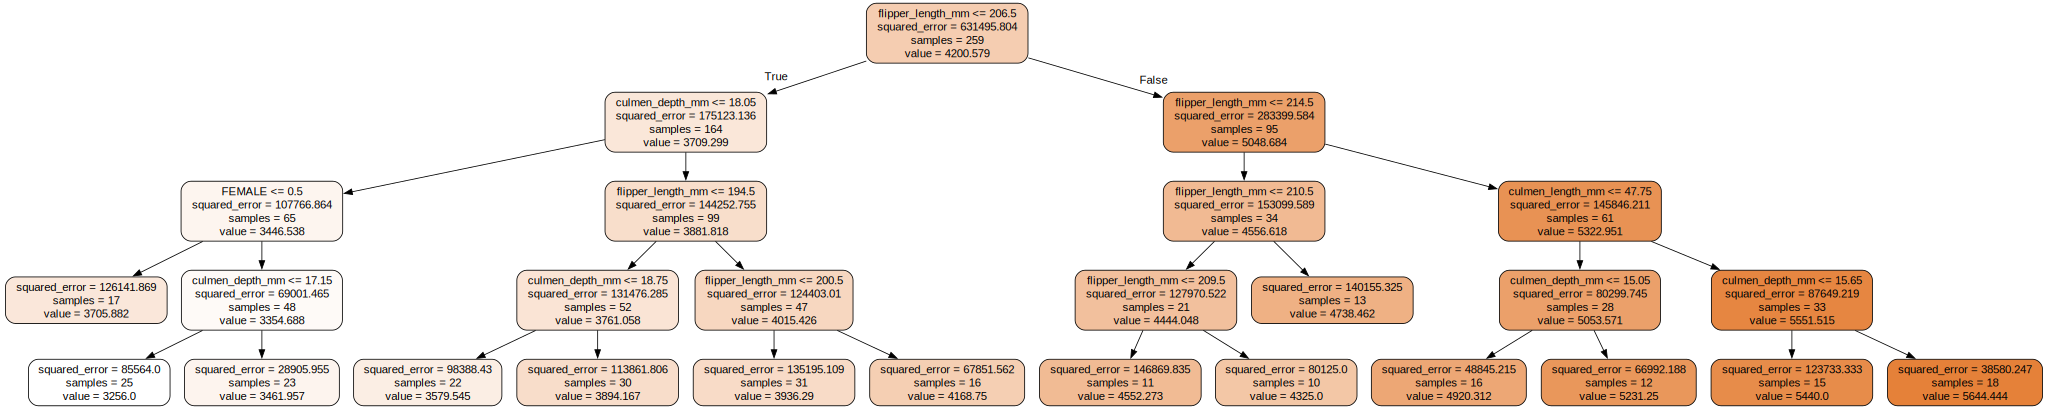

In [340]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    random_search.best_estimator_,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=train_set.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [336]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y_set, random_search.predict(test_set))

169948.0890876634

In [339]:
tree_reg_original = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_original.fit(train_set, train_y_set)
mean_squared_error(test_y_set, tree_reg_original.predict(test_set))

170307.23643752796

In [ ]:
# Crear una función que examine que cada nodo tiene el número correcto de 
# samples
# values
# MSE